<a href="https://colab.research.google.com/github/VishnubhotlaBharadwaj/100daysofPython/blob/main/DeepLearning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [ ]:
# Hyperparameters
input_size = 784
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64   
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

# Neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)   
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))  
        x = self.fc4(x)
        return x

model = Net(input_size, hidden_size1, hidden_size2, hidden_size3, num_classes)


In [ ]:
# FNN model
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.softmax(out)
        return out

fnn = FNN(input_size, hidden_size1, hidden_size2, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fnn.parameters(), lr=learning_rate)



In [ ]:
# Train the model
total_step = len(train_loader)
train_loss = []
test_loss = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        labels = labels

        # Forward pass
        outputs = fnn(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

            # Save training loss
            train_loss.append(loss.item())
    # Test the model
    with torch.no_grad():
        correct = 0
        total = 0
        test_losses = []
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            labels = labels
            outputs = fnn(images)
            test_loss = criterion(outputs, labels)
            test_losses.append(test_loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Loss: {:.4f}, Test Accuracy: {:.2f} %'
              .format(sum(test_losses) / len(test_losses), 100 * correct / total))
      

Epoch [1/10], Step [100/600], Loss: 1.6547
Epoch [1/10], Step [200/600], Loss: 1.5619
Epoch [1/10], Step [300/600], Loss: 1.5813
Epoch [1/10], Step [400/600], Loss: 1.5466
Epoch [1/10], Step [500/600], Loss: 1.5190
Epoch [1/10], Step [600/600], Loss: 1.5266
Test Loss: 1.5268, Test Accuracy: 93.68 %
Epoch [2/10], Step [100/600], Loss: 1.5215
Epoch [2/10], Step [200/600], Loss: 1.5026
Epoch [2/10], Step [300/600], Loss: 1.5649
Epoch [2/10], Step [400/600], Loss: 1.5215
Epoch [2/10], Step [500/600], Loss: 1.4999
Epoch [2/10], Step [600/600], Loss: 1.5276
Test Loss: 1.5196, Test Accuracy: 94.44 %
Epoch [3/10], Step [100/600], Loss: 1.5147
Epoch [3/10], Step [200/600], Loss: 1.4992
Epoch [3/10], Step [300/600], Loss: 1.5310
Epoch [3/10], Step [400/600], Loss: 1.5000
Epoch [3/10], Step [500/600], Loss: 1.5177
Epoch [3/10], Step [600/600], Loss: 1.4834
Test Loss: 1.5035, Test Accuracy: 95.98 %
Epoch [4/10], Step [100/600], Loss: 1.4815
Epoch [4/10], Step [200/600], Loss: 1.4829
Epoch [4/10], 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


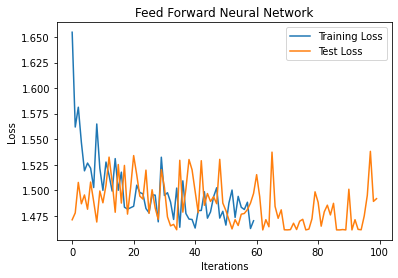

In [ ]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.plot(np.arange(len(train_loss)),train_loss, label='Training Loss')
plt.plot(np.arange(len(test_losses)),test_losses, label='Test Loss')
plt.legend()
plt.title('Feed Forward Neural Network')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
